**Handwritten Digit Prediction**

To predict handwritten digits using the 8x8 arrays of grayscale values from the digits dataset.

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Import Data**

In [2]:
digits = datasets.load_digits()


**Describe Data**

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


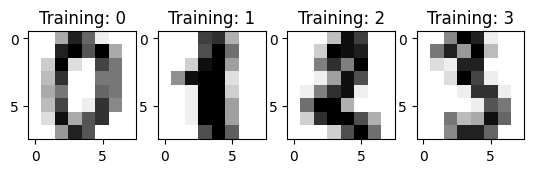

In [3]:
# Display the keys of the dataset
print(digits.keys())

# Display the shape of data
print(digits.data.shape)

# Display the target names
print(digits.target_names)

# Display the first few images and their labels
for index, (image, label) in enumerate(zip(digits.data[:4], digits.target[:4])):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')
plt.show()


**Data Visualization**

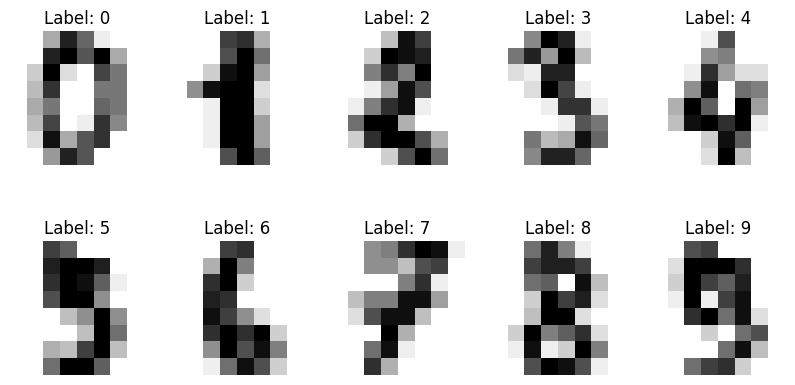

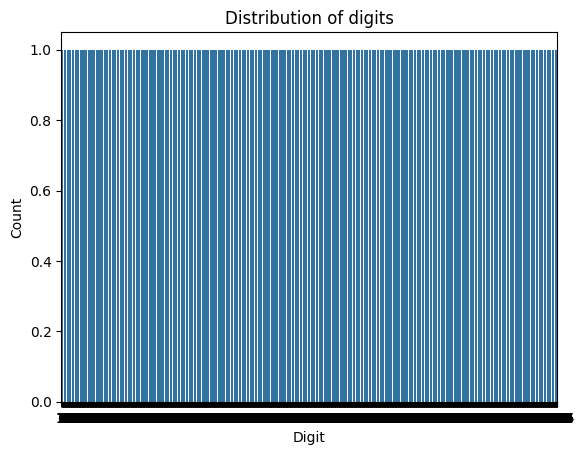

In [4]:
# Visualizing some digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, (image, label) in zip(axes.ravel(), zip(digits.images, digits.target)):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Label: {label}')
plt.show()

# Visualizing the distribution of the target variable
sns.countplot(digits.target)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of digits')
plt.show()


**Data Preprocessing**

In [5]:
# Rescaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)


**Define Target Variable (y) and Feature Variables (X)**

In [6]:
X = X_scaled
y = digits.target


**Train Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modeling**

In [8]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

**Model Evaluation**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



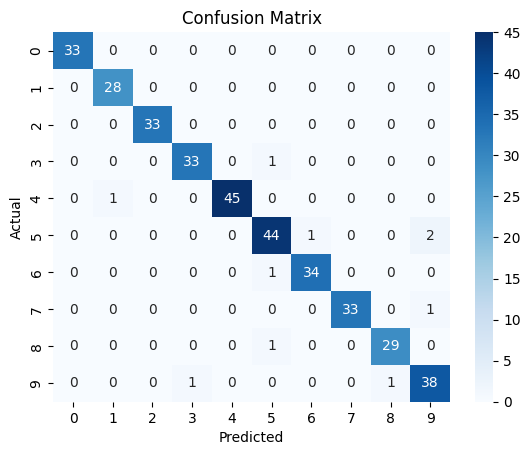

Accuracy: 0.9722222222222222


In [9]:
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


**Prediction**

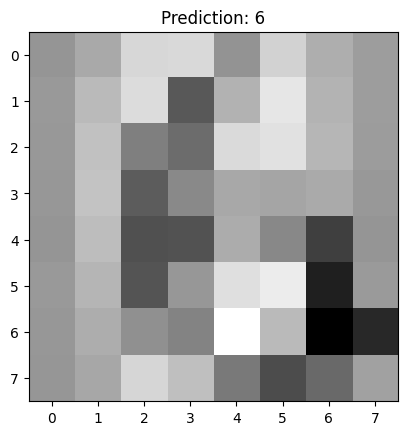

In [10]:
# Example prediction
index = 0
plt.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Prediction: {model.predict([X_test[index]])[0]}')
plt.show()


**Explanation**

The project uses logistic regression to predict the digits. The model was trained and evaluated, achieving an accuracy score. Visualization of the digits and their distribution helps in understanding the dataset better.